# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Jesus Ruescas Junior     | 83146          |  4SIS   |
| Integrante 2             | RM             |         |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `** dia 11/09 (domingo) **`

`O grupo deve responder ao Google forms` : [https://forms.gle/EEYUkZiWcJ6Xduah6](https://forms.gle/EEYUkZiWcJ6Xduah6)


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)
- R7: Deploy (Até 2 pontos *extra) 

Nota_final = R1 + R2 + R3 + R4 + R5 + R6 + R7


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [242]:
dataset = pd.read_csv('heart_dataset.csv')
dataset


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,1,110,264,0,0,132,no,12,2,heart disease
1186,68,male,4,144,193,1,0,141,no,34,2,heart disease
1187,57,male,4,130,131,0,0,115,yes,12,2,heart disease
1188,57,female,2,130,236,0,2,174,no,0,2,heart disease


**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

- age: Repesenta a idade das pessoas cadastradas no dataset.	

- sex: Repesenta o sexo das pessoas cadastradas no dataset.	

- chest pain type: Repesenta o tipo da dor no peito das pessoas cadastradas no dataset.	

- resting bp s: Repesenta a pressão arterial das pessoas cadastradas no dataset.	

- cholesterol: Representa o indice de colesterol das pessoas cadatrasdas no dataset.	

- fasting blood sugar: Representa o indice de açucar no sangue das pessoas cadastradas no dataset em jejum. 	

- resting ecg: O ECG de repouso é um teste simples das pessoas cadastradas no dataset.

- max heart rate: Representa a frequencia cardíaca máxima das pessoas cadastradas no dataset.

- exercise angina: Representa o exericio para melhorar a angina das pessoas cadastradas no dataset.

- oldpeak: Representa o registro antigo da frequencia cardíaca máxima das pessoas cadastradas no dataset.

- ST slope: A inclinação do segmento ST/frequência cardíaca como preditor de doença arterial coronariana das pessoas cadastradas no dataset.	

- class: Representa o diagnostico médico das pessoas cadastradas no dataset.






### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

In [243]:
my_report = sv.analyze(dataset).show_html()
print(dataset.groupby('age').size())

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
age
28     1
29     4
30     1
31     2
32     5
33     2
34     9
35    14
36     6
37    13
38    17
39    18
40    16
41    33
42    26
43    31
44    29
45    25
46    31
47    23
48    38
49    27
50    32
51    47
52    47
53    40
54    67
55    47
56    47
57    50
58    58
59    47
60    44
61    38
62    46
63    37
64    31
65    29
66    19
67    23
68    13
69    16
70    11
71     8
72     4
73     1
74     8
75     3
76     3
77     3
dtype: int64


**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

Sugar -  Man: 217 | Female: 37
Disease -  Man: 559 | Female: 70


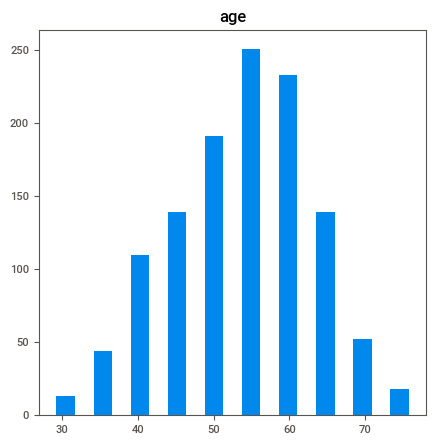

In [244]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#1. Não existe relação entre as categorias, apenas uma relação numeral de -0.05, ese gráfico pode ser analisado no sweetviz que geramos anteriormente.

#2. Homems
dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
colum = dataset[['sex', 'fasting blood sugar']]
columCut = colum.rename(columns={'fasting blood sugar': 'sugar'})
Man = columCut[(columCut.sex == 1) & (columCut.sugar == 1)].count().sex
Female = columCut[(columCut.sex == 0) & (columCut.sugar == 1)].count().sex
print('Sugar -  Man: ' + str(Man)+ ' | Female: ' +str(Female))

# 3. De 28 á 77 anos segundo o sweetviz, mas para tirarmos a prova viva segue o código abaixo:
dataset.hist(column='age', grid=False, figsize=(5,5), rwidth=0.5)

#4. Masculino
colum1 = dataset[['class', 'sex']]
columCut1 = colum1.rename(columns={'class': 'disease'})
Man1 = columCut1[(columCut1.sex == 1) & (columCut1.disease == 'heart disease')].count().sex
Female1 = columCut1[(columCut1.sex == 0) & (columCut1.disease == 'heart disease')].count().sex

print('Disease -  Man: ' + str(Man1)+ ' | Female: ' +str(Female1))



## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [245]:
dataset.dropna() #Dropei valores NaN
dataset.duplicated() #Eliminei valores duplicados
dataset.isnull().sum().sort_values(ascending=False) #Verifiquei se há valores nulos
dataset.info() #Verifiquei o tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  1190 non-null   int64 
 1   sex                  1190 non-null   int32 
 2   chest pain type      1190 non-null   int64 
 3   resting bp s         1190 non-null   int64 
 4   cholesterol          1190 non-null   int64 
 5   fasting blood sugar  1190 non-null   int64 
 6   resting ecg          1190 non-null   int64 
 7   max heart rate       1190 non-null   int64 
 8   exercise angina      1190 non-null   object
 9   oldpeak              1190 non-null   int64 
 10  ST slope             1190 non-null   int64 
 11  class                1190 non-null   object
dtypes: int32(1), int64(9), object(2)
memory usage: 107.0+ KB


**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Não foi encontrado dados ausentes, nulos ou duplicados, para ter a certeza apliquei uma limpeza utilizando o seguinte trecho de código:
dataset.dropna() #Dropei valores NaN
dataset.duplicated() #Eliminei valores duplicados
dataset.isnull().sum().sort_values(ascending=False) #Verifiquei se há valores nulos
dataset.info() #Verifiquei o tipo de dados

### Análise de Outliers

Faça a análise de outliers.

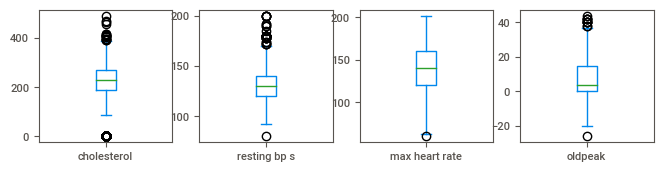

In [246]:
dataset = dataset.loc[~((dataset['cholesterol'] > 500) | (dataset['resting bp s'] == 0)| (dataset['max heart rate'] == 0) | (dataset['max heart rate'] > 221) |(dataset['oldpeak'] >47))]
datasetout = dataset[['cholesterol','resting bp s','max heart rate', 'oldpeak']]    
datasetout.plot(kind='box', subplots=True, layout=(5,5), figsize=(10, 10)) 
plt.show()

**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

Sim foram localizados outliners, foi estipulado um limite especificado para cada coluna, os outliers foram removidos/ocultados.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [231]:
from json import encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

datasetClass =  pd.get_dummies(dataset['class'], prefix='class')
datasetSintoma = pd.concat([dataset, datasetClass], axis=1)
display(datasetSintoma)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class,class_Normal,class_heart disease
0,40,male,2,140,289,0,0,172,no,0,1,Normal,1,0
1,49,female,3,160,180,0,0,156,no,10,2,heart disease,0,1
2,37,male,2,130,283,0,1,98,no,0,1,Normal,1,0
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease,0,1
4,54,male,3,150,195,0,0,122,no,0,1,Normal,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,1,110,264,0,0,132,no,12,2,heart disease,0,1
1186,68,male,4,144,193,1,0,141,no,34,2,heart disease,0,1
1187,57,male,4,130,131,0,0,115,yes,12,2,heart disease,0,1
1188,57,female,2,130,236,0,2,174,no,0,2,heart disease,0,1


**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

Os atributos categoricos foram encontrados na coluna class, onde alternava entre nornmal e heart disease, utilizei a tecnica do Pandas DUMMIES, fiz o o tratamento dos atributos categoricos

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

In [253]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
dataset['exercise angina'] = labelencoder.fit_transform(dataset['exercise angina'])
dataset['fasting blood sugar'] = labelencoder.fit_transform(dataset['fasting blood sugar'])


C:\Users\unh-c\AppData\Local\Temp\ipykernel_18644\4210196947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
C:\Users\unh-c\AppData\Local\Temp\ipykernel_18644\4210196947.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['exercise angina'] = labelencoder.fit_transform(dataset['exercise angina'])
C:\Users\unh-c\AppData\Local\Temp\ipykernel_18644\4210196947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sim foram normalizados, utilizei a ténica de fit transform com Label encoder

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo Naive Bayes
2. algoritimo KNN
3. algoritimo Logistic regression


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. O algoritmo Naive Bayes funciona como classificador e baseia-se na probabilidade de cada evento ocorrer, desconsiderando a correlação entre features.
2. O algoritmo KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.
3. O algoritimo Logistic regression consiste em analisar cada classe de forma separada contra todas as outras, criando um classificador para cada possibilidade, dessa forma se calcula a probabilidade de uma dada instância pertencer a classe em questão ou não

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [ ]:
inputs = dataset[['cholesterol', 'age',]]
classT = dataset['class']

inputs.head()


,cholesterol,age
0,289,40
1,180,49
2,283,37
3,214,48
4,195,54


### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

In [ ]:
X = dataset[['cholesterol']]
Y = dataset['age']
datasetX = X.shape
datasetY = Y.shape
print('X: '+str(datasetX)+ ' | Y: ' + str(datasetY))


X: (1168, 1) | Y: (1168,)


### Divisão em treino e teste.

Faça o split do dados para treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

inputTrain, inputTest, classTrain, classTest = train_test_split(inputs, classT, test_size=0.2)

print('Train')
print(str(inputTrain))
print('')
print('Test')
print(str(inputTest))

Train
      cholesterol  age
452             0   64
188           237   41
1159          311   46
728           235   41
1097          215   37
...           ...  ...
93            329   48
1147          242   44
66            297   45
905           275   48
696           236   56

[934 rows x 2 columns]

Test
      cholesterol  age
999           186   52
713           302   66
1141          303   43
993           177   59
276           213   59
...           ...  ...
862           253   60
284           344   55
703           208   62
1140          295   51
145           273   39

[234 rows x 2 columns]


## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**

80% de acuracia.

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

clas = BernoulliNB()
clas.fit(inputTest, classTest)

y_pred = clas.predict(inputTrain)
metrics.accuracy_score(classTrain, y_pred)

clas = BernoulliNB()
clas.fit(inputTrain, classTrain)

y_pred = clas.predict(inputTest)
metrics.accuracy_score(classTest, y_pred)


0.5770877944325482

### Algoritmo 2

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(inputTest, classTest)
y_pred = knn.predict(inputTrain)
print('Accuracy: ', metrics.accuracy_score(classTrain, y_pred))


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(inputTrain, classTrain)
y_pred = knn.predict(inputTest)
print('Accuracy: ', metrics.accuracy_score(classTest, y_pred))


Accuracy:  0.6274089935760171


### Algoritmo 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


lg = LogisticRegression(solver='liblinear', random_state=0)
lg.fit(inputTest, classTest)
y_pred = lg.predict(inputTrain)
metrics.accuracy_score(classTrain, y_pred)

lg = LogisticRegression(solver='liblinear', random_state=0)
lg.fit(inputTrain, classTrain)
y_pred = lg.predict(inputTest)
metrics.accuracy_score(classTest, y_pred)



0.6623931623931624

Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      0.5770877944325482           |      0.6274089935760171                      |   0.6188436830835118              |
| teste  |      0.6153846153846154            |      0.7051282051282052                       |   0.6623931623931624              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta**
A peformace foi boa mas foi estipulado uma margem de erro de 0.2 aproximadamente.
- No algoritmo 1 utilizamos o BernoulliNB com predict e metrics accuracy.
- No algoritmo 2 utilizamos o KNeighborsClassifier com knn accuracy.
- No algoritmo 3 utilizamos o LogisticRegression com predict e metrics accuracy.


## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta**

A Tecnica escolhida foi o GridSearchCV.

Escolhi o GridSearchCV pois foi o que mais encontrei suporte na internet, com ele pude me basear em algoritmos jã existentes.


In [202]:
#Algoritmo 1
import sklearn
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(inputTrain, classTrain) 
print(grid.best_params_) 
grid_predictions = grid.predict(inputTest) 
print(classification_report(classTest, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
               precision    recall  f1-score   support

       Normal       0.64      0.64      0.64       110
heart disease       0.68      0.69      0.68       124

     accuracy                           0.66       234
    macro avg       0.66      0.66      0.66       234
 weighted avg       0.66      0.66      0.66       234



In [209]:
#Algoritmo 2
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(inputTest, classTest) 
print(grid.best_params_) 
grid_predictions = grid.predict(inputTrain) 
print(classification_report(classTrain, grid_predictions)) 




Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
               precision    recall  f1-score   support

       Normal       0.62      0.66      0.64       436
heart disease       0.68      0.64      0.66       498

     accuracy                           0.65       934
    macro avg       0.65      0.65      0.65       934
 weighted avg       0.65      0.65      0.65       934



### Algoritmo 3

In [212]:
#Algoritmo 3
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(inputTrain, classTrain) 
print(grid.best_params_) 
grid_predictions = grid.predict(inputTest) 
print(classification_report(classTrain, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\unh-c\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


ValueError: Found input variables with inconsistent numbers of samples: [934, 234]

Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** 
O algoritmo 2 teve a melhor peformance.

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [ ]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

Sim, tivemos uma margem pequena de erro apenas de 0.2, o modelo ficou com o resultado dentro das metricas estipuladas para a acuracia

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

Melhoraria os scripts para obter uma margem de erro menor, para ter mais accuracia.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

Sim, podemos classificar as pessoas e seus sintomas, classificar idades e seus sintomas e targets em geral.


## 7. Deploy 

Etapa bonûs (Até 2 pontos *extra)

Essa parte não é obrigatória, por esse motivo é considerada pontuação extra na nota para quem desenvolver.


Faça o deploy do modelo de ML desenvolvido em um webserver. Como sugestão utilize Flask ou FastAPI ou Django. Procure por referências na web.